In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# File to Load 
ride_data_to_load = "data/ride_data.csv"
city_data_to_load = "data/city_data.csv"

# Read the files and store into Pandas data frame
ride_data_df = pd.read_csv(ride_data_to_load)
city_data_df = pd.read_csv(city_data_to_load)

#Summarize the average fare by city
city_data_summary = ride_data_df[['city', 'fare']]
#city_data_summary.head()
fare_by_city= city_data_summary.groupby(['city'])['fare'].mean()
rides_by_city = city_data_summary.groupby(['city'])['fare'].count()
#rides_by_city.head(100)
city_summary = pd.DataFrame({'average fare':fare_by_city, "total rides by city":rides_by_city})
#city_summary.head()

#Combine the data into a single dataset
ride_share_data= pd.merge(city_summary, city_data_df, how='outer', on='city')
ride_share_data.head()


,city,average fare,total rides by city,driver_count,type
0,Amandaburgh,24.641667,18,12,Urban
1,Barajasview,25.332273,22,26,Urban
2,Barronchester,36.422500,16,11,Suburban
3,Bethanyland,32.956111,18,22,Suburban
4,Bradshawfurt,40.064000,10,7,Rural


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


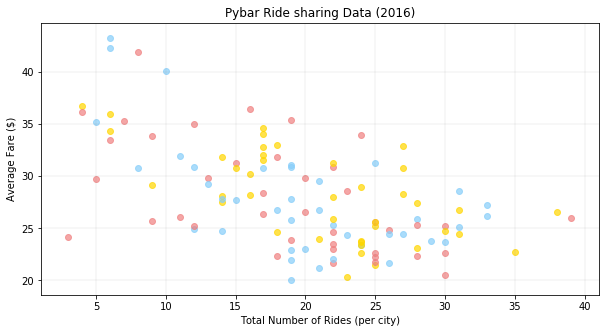

In [2]:
#Obtain the x and y coordinates for each of the three city types

#redefine the type to color


def scatterplot(ride_share_data,x=ride_share_data['total rides by city'], y=ride_share_data['average fare']):
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    #assign the color to each data point
    colors = ['gold', 'lightskyblue', 'lightcoral']
    
    #iterate through the dataset plotting each data point and assinging it to the corresponding color
    for i in range (len(ride_share_data)):
        ax.scatter(x.ix[i],y.ix[i], alpha=0.70, color=colors[i%len(colors)])
    
    #add labels
    plt.title('Pybar Ride sharing Data (2016)')
    plt.xlabel('Total Number of Rides (per city)')
    plt.ylabel('Average Fare ($)')
    
    #add gridlines
    ax.grid(color='grey', linestyle='-', linewidth = 0.25, alpha = 0.5)
    
    #add legend
    plt.legend

    plt.show()

scatterplot(ride_share_data,x=ride_share_data['total rides by city'], y=ride_share_data['average fare'])


In [62]:
#Total Rides by City Type
#Calculate total ride by city type
sum_rides_type = ride_share_data.groupby(["type"]).sum()

#Place the city types into a list
sum_rides_type.head()


,average fare,total rides by city,driver_count
type,,,
Rural,623.479771,125,78
Suburban,1106.542729,625,490
Urban,1616.942033,1625,2405


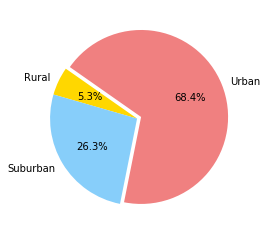

In [74]:
# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.05)

#assign the color to each data point and assign the label
colors = ['gold', 'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']

#Build Pie Chart
plt.pie(sum_rides_type['total rides by city'],explode=explode, labels=labels, 
           colors=colors, autopct="%1.1f%%",startangle=145)
plt.show()

In [ ]:
#Total Drivers by City Type